(100,)
Abbe Number for thius glas: 11.28


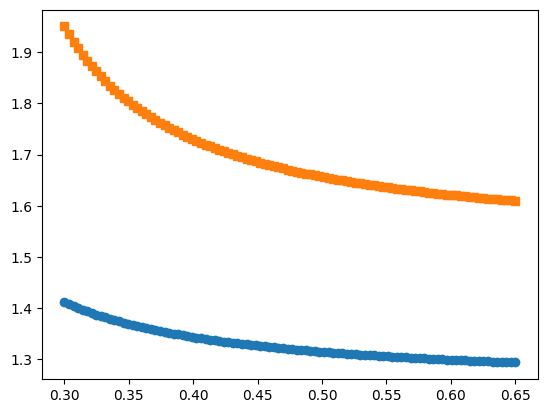

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

WavD  = 0.58756
WavF  = 0.4861
Wavc  = 0.6563  ## um

def SellMeier(As,wav):
  #### assumes a matrix As
  #### As[0,1:3] = B
  #### As[1,1:3] = C

  RI = 0
  for i in range(3):
    RI = RI + As[0,i]*wav**2 /(wav**2 - As[1,i])
  return RI

###########################################
def AbbeN(As):
  RIc = SellMeier(As,Wavc)
  RID = SellMeier(As,WavD)
  RIF = SellMeier(As,WavF)

  V = (RID-1)/(RIF-RIc)
  return(V)

def SelectGlass(glass):
  As      = np.zeros((2,3))
  if glass =='BK7':
    As[0,0] = 1.03961212
    As[0,1] = 0.231792344
    As[0,2] = 1.01046945

    As[1,0] = 6.00069867 *0.001
    As[1,1] = 2.00179144 *0.01
    As[1,2] = 1.03560653 * 100
    return(As)
  elif glass == 'SF2':
    As[0,0] = 1.34533359
    As[0,1] = 0.209073276
    As[0,2] = 0.937357162

    As[1,0] = 0.00997743871
    As[1,1] = 0.0470450767
    As[1,2] = 111.886764
    return(As)

  else:
    return (As)

########### main
##type of glass: BK7
Np      = 100

wav     = np.linspace(0.3,0.65,Np)
print (wav.shape)

As      = SelectGlass('BK7')
RIBK7     = SellMeier(As,wav)
As      = SelectGlass('SF2')
RISF2     = SellMeier(As,wav)

plt.figure()
plt.plot(wav,RIBK7,'o-')
plt.plot(wav,RISF2,'s')

print ('Abbe Number for thius glas:',round(AbbeN(As),2))



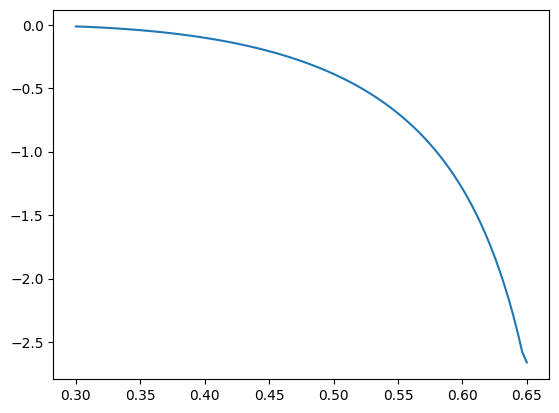

In [ ]:
######### now compute the derivative and the aberration

Rcurv       = 0.1   ## m
RI1d        = np.gradient(RIBK7, wav)
RI2d        = np.gradient(RISF2, wav)
Aberration  = (2*RI1d -RI2d) / Rcurv   ### dioptric

Focal_ave   = (RIBK7[50]-1)*2/Rcurv - (RISF2[50]-1)/Rcurv
plt.figure()
plt.plot(wav,Focal_ave / Aberration)